# Surface Weather Stations & Univariate Analysis

### Geography 531

### 01/28/2019

### By David Leifer

![alt text](xkcd.png "Title")

In [ ]:
import pandas as pd
import numpy as np


In [56]:
df = pd.read_excel('ord_daily_weather.xlsx', sheet_name='Sheet1')
df

,station,day,max_temp_f,min_temp_f,max_dewpoint_f,min_dewpoint_f
0,ORD,1948-01-01,32,28,32,28
1,ORD,1948-01-02,30,24,27,24
2,ORD,1948-01-03,34,25,32,25
3,ORD,1948-01-04,34,25,30,25
4,ORD,1948-01-05,33,26,31,26
5,ORD,1948-01-06,31,14,30,14
6,ORD,1948-01-07,35,10,30,10
7,ORD,1948-01-08,38,19,36,19
8,ORD,1948-01-09,36,29,32,29
9,ORD,1948-01-10,31,15,24,15


## Introduction

Climatic and weather data is routinely downloaded, scrapped, and processed as an original source of information to provide insights into spatial patterns of climatology. Although these data are gold standard of climatology, there are many processing issues that need to be addressed before conclusions can be drawn. Data cleaning and processing is needed to prepare this data for analysis. We downloaded Automated Surface Observing Systems (ASOS) weather data from January 1st 1948 until December 31st, 2018 from the Iowa Environmental Mesonet database on the station located at Chicago O’Hare. The data was then cleaned using data science techniques and the scripting language python in the Jupyter Notebook environment. Plots were drawn using built in libraries and analysis was conducted. We found a positive trend in the data indicating a slight warming pattern for this time period. Further work is required to expand the data from one dimension into higher dimensionality and include gridded coverage along a timeline.

In [3]:
df = df.replace(-99, None)

In [4]:
df = df.convert_objects(convert_numeric=True)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [5]:
df['avg_temp_f'] = df[['max_temp_f', 'min_temp_f']].mean(axis=1)
df['avg_dp_f'] = df[['max_dewpoint_f', 'min_dewpoint_f']].mean(axis=1)

In [6]:
df

,station,day,max_temp_f,min_temp_f,max_dewpoint_f,min_dewpoint_f,avg_temp_f,avg_dp_f
0,ORD,1948-01-01,32.0,28.0,32.0,28.0,30.0,30.00
1,ORD,1948-01-02,30.0,24.0,27.0,24.0,27.0,25.50
2,ORD,1948-01-03,34.0,25.0,32.0,25.0,29.5,28.50
3,ORD,1948-01-04,34.0,25.0,30.0,25.0,29.5,27.50
4,ORD,1948-01-05,33.0,26.0,31.0,26.0,29.5,28.50
5,ORD,1948-01-06,31.0,14.0,30.0,14.0,22.5,22.00
6,ORD,1948-01-07,35.0,10.0,30.0,10.0,22.5,20.00
7,ORD,1948-01-08,38.0,19.0,36.0,19.0,28.5,27.50
8,ORD,1948-01-09,36.0,29.0,32.0,29.0,32.5,30.50
9,ORD,1948-01-10,31.0,15.0,24.0,15.0,23.0,19.50


## Methodology

Once the data was downloaded, the python package pandas was used to import that data and visualize the data in tabular form. The columns for station, day, max temperature, min temperature, max due point, and minimum due point were identified. The most insidious of values in a weather dataset are erroneous data values, which take the form of -99 or -999. It was thus necessary to remove these from our dataset and replace them with a moniker such as “NaN” or “none” using panda’s built in function “replace”. It was then required that the average temperature and dew point between max and min columns be calculated, which occurred using the .mean() function and creating a new column indicator in pandas. Since we are budding scientists and our data was in Fahrenheit, we converted all six of our columns into Celsius using a custom python function.

It was established that we can only use data for years that had enough non-missing data in the column. The threshold for this was created at 10%. If a year’s worth of days had less than 10% worth of data, the year was dropped completely from the data. This was accomplished using the .groupby() function of pandas for each variable and then merged together along the year column. For these years, we then calculated a mean for each of the six Celsius columns. 
    

In [7]:
def fahr_to_celsius(temp_fahr):
    """Convert Fahrenheit to Celsius
    
    Return Celsius conversion of input"""
    temp_celsius = (temp_fahr - 32) * 5 / 9
    return temp_celsius

In [8]:
df["max_temp_c"] = fahr_to_celsius(df["max_temp_f"])
df["min_temp_c"] = fahr_to_celsius(df["min_temp_f"])
df["max_dewpoint_c"] = fahr_to_celsius(df["max_dewpoint_f"])
df["min_dewpoint_c"] = fahr_to_celsius(df["min_dewpoint_f"])
df["avg_temp_c"] = fahr_to_celsius(df["avg_temp_f"])
df["avg_dp_c"] = fahr_to_celsius(df["avg_dp_f"])


In [9]:
df['day'] = pd.to_datetime(df['day'])

In [10]:
df[['year','month','day']] = df.day.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))
df.to_csv('df.csv', sep=',')

In [11]:
df2 = df.min_dewpoint_f.isnull().groupby([df['year']]).sum().astype(int).reset_index(name='min_dewpoint_f_count')


In [12]:
df2

,year,min_dewpoint_f_count
0,1948,3
1,1949,0
2,1950,0
3,1951,0
4,1952,0
5,1953,0
6,1954,0
7,1955,0
8,1956,0
9,1957,0


In [13]:
df2['min_dewpoint_f_percentage'] = ((df2['min_dewpoint_f_count']/365)*100)

In [14]:
df2

,year,min_dewpoint_f_count,min_dewpoint_f_percentage
0,1948,3,0.821918
1,1949,0,0.000000
2,1950,0,0.000000
3,1951,0,0.000000
4,1952,0,0.000000
5,1953,0,0.000000
6,1954,0,0.000000
7,1955,0,0.000000
8,1956,0,0.000000
9,1957,0,0.000000


In [15]:
df2.to_csv('years_greaterthan_ten.csv', sep=',')

In [16]:
threshold = df2[df2.min_dewpoint_f_percentage > 10]

In [17]:
threshold

,year,min_dewpoint_f_count,min_dewpoint_f_percentage
48,1996,366,100.273973
49,1997,365,100.000000
50,1998,365,100.000000
51,1999,365,100.000000
52,2000,53,14.520548


In [18]:
#df.to_csv('threshold.csv', sep=',')
#manually removed data for these years

In [19]:
df = pd.read_csv('threshold.csv')

In [20]:
df

,Unnamed: 0,station,day,max_temp_f,min_temp_f,max_dewpoint_f,min_dewpoint_f,avg_temp_f,avg_dp_f,max_temp_c,min_temp_c,max_dewpoint_c,min_dewpoint_c,avg_temp_c,avg_dp_c,year,month
0,0,ORD,1,32.0,28.0,32.0,28.0,30.0,30.00,0.000000,-2.222222,0.000000,-2.222222,-1.111111,-1.111111,1948,1
1,1,ORD,2,30.0,24.0,27.0,24.0,27.0,25.50,-1.111111,-4.444444,-2.777778,-4.444444,-2.777778,-3.611111,1948,1
2,2,ORD,3,34.0,25.0,32.0,25.0,29.5,28.50,1.111111,-3.888889,0.000000,-3.888889,-1.388889,-1.944444,1948,1
3,3,ORD,4,34.0,25.0,30.0,25.0,29.5,27.50,1.111111,-3.888889,-1.111111,-3.888889,-1.388889,-2.500000,1948,1
4,4,ORD,5,33.0,26.0,31.0,26.0,29.5,28.50,0.555556,-3.333333,-0.555556,-3.333333,-1.388889,-1.944444,1948,1
5,5,ORD,6,31.0,14.0,30.0,14.0,22.5,22.00,-0.555556,-10.000000,-1.111111,-10.000000,-5.277778,-5.555556,1948,1
6,6,ORD,7,35.0,10.0,30.0,10.0,22.5,20.00,1.666667,-12.222222,-1.111111,-12.222222,-5.277778,-6.666667,1948,1
7,7,ORD,8,38.0,19.0,36.0,19.0,28.5,27.50,3.333333,-7.222222,2.222222,-7.222222,-1.944444,-2.500000,1948,1
8,8,ORD,9,36.0,29.0,32.0,29.0,32.5,30.50,2.222222,-1.666667,0.000000,-1.666667,0.277778,-0.833333,1948,1
9,9,ORD,10,31.0,15.0,24.0,15.0,23.0,19.50,-0.555556,-9.444444,-4.444444,-9.444444,-5.000000,-6.944444,1948,1


In [21]:
df3 = df.max_temp_c.groupby([df['year']]).mean().reset_index(name='max_temp_c_mean')
df4 = df.min_temp_c.groupby([df['year']]).mean().reset_index(name='min_temp_c_mean')
df5 = df.max_dewpoint_c.groupby([df['year']]).mean().reset_index(name='max_dewpoint_c_mean')
df6 = df.min_dewpoint_c.groupby([df['year']]).mean().reset_index(name='min_dewpoint_c_mean')
df7 = df.avg_temp_c.groupby([df['year']]).mean().reset_index(name='avg_temp_c_mean')
df8 = df.avg_dp_c.groupby([df['year']]).mean().reset_index(name='avg_dp_c_mean')


In [22]:
from functools import reduce
data_frames = [df3, df4, df5, df6, df7, df8]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['year'], how='outer'), data_frames)


In [23]:
df_merged

,year,max_temp_c_mean,min_temp_c_mean,max_dewpoint_c_mean,min_dewpoint_c_mean,avg_temp_c_mean,avg_dp_c_mean
0,1948,14.312906,3.792943,8.474157,3.792943,9.052925,6.133550
1,1949,15.112633,4.343988,8.945205,4.343988,9.728311,6.644597
2,1950,13.248097,2.719939,7.187215,2.719939,7.984018,4.953577
3,1951,12.966514,3.021309,7.608828,3.021309,7.993912,5.315068
4,1952,14.776867,4.483910,7.595628,4.483910,9.630389,6.039769
5,1953,15.645358,5.056317,8.441400,5.056317,10.350837,6.748858
6,1954,14.975647,5.203957,8.710807,5.203957,10.089802,6.957382
7,1955,15.210046,4.415525,7.910198,4.415525,9.812785,6.162861
8,1956,15.215543,5.144202,7.463570,5.144202,10.179872,6.303886
9,1957,14.063927,4.310502,7.665145,4.310502,9.187215,5.987823


In [24]:
quantiles = df['max_temp_c'].quantile(q=[0.1,0.9])
quantiles

0.1    -1.111111
0.9    29.444444
Name: max_temp_c, dtype: float64

In [25]:
criteria = df['max_temp_c'] < -1.111111
df_over = df[criteria]
#criteria2 = df['max_temp_c'] > 29.444444
#df_over_under = df_over[criteria2]
df_over

,Unnamed: 0,station,day,max_temp_f,min_temp_f,max_dewpoint_f,min_dewpoint_f,avg_temp_f,avg_dp_f,max_temp_c,min_temp_c,max_dewpoint_c,min_dewpoint_c,avg_temp_c,avg_dp_c,year,month
1,1,ORD,2,30.0,24.0,27.0,24.0,27.0,25.50,-1.111111,-4.444444,-2.777778,-4.444444,-2.777778,-3.611111,1948,1
12,12,ORD,13,22.0,8.0,16.0,8.0,15.0,12.00,-5.555556,-13.333333,-8.888889,-13.333333,-9.444444,-11.111111,1948,1
13,13,ORD,14,7.0,-3.0,0.0,-3.0,2.0,-1.50,-13.888889,-19.444444,-17.777778,-19.444444,-16.666667,-18.611111,1948,1
15,15,ORD,16,9.0,-4.0,4.0,-4.0,2.5,0.00,-12.777778,-20.000000,-15.555556,-20.000000,-16.388889,-17.777778,1948,1
16,16,ORD,17,6.0,-11.0,-8.0,-11.0,-2.5,-9.50,-14.444444,-23.888889,-22.222222,-23.888889,-19.166667,-23.055556,1948,1
17,17,ORD,18,15.0,-11.0,5.0,-11.0,2.0,-3.00,-9.444444,-23.888889,-15.000000,-23.888889,-16.666667,-19.444444,1948,1
18,18,ORD,19,24.0,1.0,15.0,1.0,12.5,8.00,-4.444444,-17.222222,-9.444444,-17.222222,-10.833333,-13.333333,1948,1
20,20,ORD,21,27.0,2.0,21.0,2.0,14.5,11.50,-2.777778,-16.666667,-6.111111,-16.666667,-9.722222,-11.388889,1948,1
21,21,ORD,22,13.0,-4.0,7.0,-4.0,4.5,1.50,-10.555556,-20.000000,-13.888889,-20.000000,-15.277778,-16.944444,1948,1
22,22,ORD,23,13.0,-3.0,3.0,-3.0,5.0,0.00,-10.555556,-19.444444,-16.111111,-19.444444,-15.000000,-17.777778,1948,1


In [26]:
quantiles = df['min_temp_c'].quantile(q=[0.1,0.9])
quantiles

0.1    -9.444444
0.9    18.888889
Name: min_temp_c, dtype: float64

In [27]:
criteria = df['min_temp_c'] < -9.444444
df_over = df[criteria]
criteria2 = df['min_temp_c'] > 18.888889
df_over_under = df_over[criteria2]
df_over

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,Unnamed: 0,station,day,max_temp_f,min_temp_f,max_dewpoint_f,min_dewpoint_f,avg_temp_f,avg_dp_f,max_temp_c,min_temp_c,max_dewpoint_c,min_dewpoint_c,avg_temp_c,avg_dp_c,year,month
5,5,ORD,6,31.0,14.0,30.0,14.0,22.5,22.00,-0.555556,-10.000000,-1.111111,-10.000000,-5.277778,-5.555556,1948,1
6,6,ORD,7,35.0,10.0,30.0,10.0,22.5,20.00,1.666667,-12.222222,-1.111111,-12.222222,-5.277778,-6.666667,1948,1
9,9,ORD,10,31.0,15.0,24.0,15.0,23.0,19.50,-0.555556,-9.444444,-4.444444,-9.444444,-5.000000,-6.944444,1948,1
12,12,ORD,13,22.0,8.0,16.0,8.0,15.0,12.00,-5.555556,-13.333333,-8.888889,-13.333333,-9.444444,-11.111111,1948,1
13,13,ORD,14,7.0,-3.0,0.0,-3.0,2.0,-1.50,-13.888889,-19.444444,-17.777778,-19.444444,-16.666667,-18.611111,1948,1
14,14,ORD,15,34.0,6.0,29.0,6.0,20.0,17.50,1.111111,-14.444444,-1.666667,-14.444444,-6.666667,-8.055556,1948,1
15,15,ORD,16,9.0,-4.0,4.0,-4.0,2.5,0.00,-12.777778,-20.000000,-15.555556,-20.000000,-16.388889,-17.777778,1948,1
16,16,ORD,17,6.0,-11.0,-8.0,-11.0,-2.5,-9.50,-14.444444,-23.888889,-22.222222,-23.888889,-19.166667,-23.055556,1948,1
17,17,ORD,18,15.0,-11.0,5.0,-11.0,2.0,-3.00,-9.444444,-23.888889,-15.000000,-23.888889,-16.666667,-19.444444,1948,1
18,18,ORD,19,24.0,1.0,15.0,1.0,12.5,8.00,-4.444444,-17.222222,-9.444444,-17.222222,-10.833333,-13.333333,1948,1


In [28]:
quantiles = df['max_dewpoint_c'].quantile(q=[0.1,0.9])
quantiles

0.1    -5.600000
0.9    20.555556
Name: max_dewpoint_c, dtype: float64

In [29]:
criteria = df['max_dewpoint_c'] < -5.600000
df_over = df[criteria]
criteria2 = df['max_dewpoint_c'] > 20.555556
df_over_under = df_over[criteria2]
df_over

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,Unnamed: 0,station,day,max_temp_f,min_temp_f,max_dewpoint_f,min_dewpoint_f,avg_temp_f,avg_dp_f,max_temp_c,min_temp_c,max_dewpoint_c,min_dewpoint_c,avg_temp_c,avg_dp_c,year,month
12,12,ORD,13,22.0,8.0,16.0,8.0,15.0,12.00,-5.555556,-13.333333,-8.888889,-13.333333,-9.444444,-11.111111,1948,1
13,13,ORD,14,7.0,-3.0,0.0,-3.0,2.0,-1.50,-13.888889,-19.444444,-17.777778,-19.444444,-16.666667,-18.611111,1948,1
15,15,ORD,16,9.0,-4.0,4.0,-4.0,2.5,0.00,-12.777778,-20.000000,-15.555556,-20.000000,-16.388889,-17.777778,1948,1
16,16,ORD,17,6.0,-11.0,-8.0,-11.0,-2.5,-9.50,-14.444444,-23.888889,-22.222222,-23.888889,-19.166667,-23.055556,1948,1
17,17,ORD,18,15.0,-11.0,5.0,-11.0,2.0,-3.00,-9.444444,-23.888889,-15.000000,-23.888889,-16.666667,-19.444444,1948,1
18,18,ORD,19,24.0,1.0,15.0,1.0,12.5,8.00,-4.444444,-17.222222,-9.444444,-17.222222,-10.833333,-13.333333,1948,1
20,20,ORD,21,27.0,2.0,21.0,2.0,14.5,11.50,-2.777778,-16.666667,-6.111111,-16.666667,-9.722222,-11.388889,1948,1
21,21,ORD,22,13.0,-4.0,7.0,-4.0,4.5,1.50,-10.555556,-20.000000,-13.888889,-20.000000,-15.277778,-16.944444,1948,1
22,22,ORD,23,13.0,-3.0,3.0,-3.0,5.0,0.00,-10.555556,-19.444444,-16.111111,-19.444444,-15.000000,-17.777778,1948,1
23,23,ORD,24,17.0,-2.0,14.0,-2.0,7.5,6.00,-8.333333,-18.888889,-10.000000,-18.888889,-13.611111,-14.444444,1948,1


In [30]:
quantiles = df['min_dewpoint_c'].quantile(q=[0.1,0.9])
quantiles

0.1   -10.555556
0.9    19.444444
Name: min_dewpoint_c, dtype: float64

In [31]:
criteria = df['min_dewpoint_c'] < -10.555556
df_over = df[criteria]
criteria2 = df['min_dewpoint_c'] > 19.444444
df_over_under = df_over[criteria2]
df_over

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,Unnamed: 0,station,day,max_temp_f,min_temp_f,max_dewpoint_f,min_dewpoint_f,avg_temp_f,avg_dp_f,max_temp_c,min_temp_c,max_dewpoint_c,min_dewpoint_c,avg_temp_c,avg_dp_c,year,month
6,6,ORD,7,35.0,10.0,30.0,10.0,22.5,20.00,1.666667,-12.222222,-1.111111,-12.222222,-5.277778,-6.666667,1948,1
12,12,ORD,13,22.0,8.0,16.0,8.0,15.0,12.00,-5.555556,-13.333333,-8.888889,-13.333333,-9.444444,-11.111111,1948,1
13,13,ORD,14,7.0,-3.0,0.0,-3.0,2.0,-1.50,-13.888889,-19.444444,-17.777778,-19.444444,-16.666667,-18.611111,1948,1
14,14,ORD,15,34.0,6.0,29.0,6.0,20.0,17.50,1.111111,-14.444444,-1.666667,-14.444444,-6.666667,-8.055556,1948,1
15,15,ORD,16,9.0,-4.0,4.0,-4.0,2.5,0.00,-12.777778,-20.000000,-15.555556,-20.000000,-16.388889,-17.777778,1948,1
16,16,ORD,17,6.0,-11.0,-8.0,-11.0,-2.5,-9.50,-14.444444,-23.888889,-22.222222,-23.888889,-19.166667,-23.055556,1948,1
17,17,ORD,18,15.0,-11.0,5.0,-11.0,2.0,-3.00,-9.444444,-23.888889,-15.000000,-23.888889,-16.666667,-19.444444,1948,1
18,18,ORD,19,24.0,1.0,15.0,1.0,12.5,8.00,-4.444444,-17.222222,-9.444444,-17.222222,-10.833333,-13.333333,1948,1
19,19,ORD,20,35.0,-1.0,31.0,-1.0,17.0,15.00,1.666667,-18.333333,-0.555556,-18.333333,-8.333333,-9.444444,1948,1
20,20,ORD,21,27.0,2.0,21.0,2.0,14.5,11.50,-2.777778,-16.666667,-6.111111,-16.666667,-9.722222,-11.388889,1948,1


In [32]:
df = df.dropna(axis = 0, how ='any') 

In [33]:
#df['Date'] = pd.to_datetime(df.assign(Day=1).loc[:, ['year','month','day']])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
from IPython.display import HTML, display
#https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

y = df_merged["max_temp_c_mean"]
X = df_merged["year"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        max_temp_c_mean   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.181e+04
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           4.52e-89
Time:                        14:26:56   Log-Likelihood:                -87.938
No. Observations:                  71   AIC:                             177.9
Df Residuals:                      70   BIC:                             180.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.0074   5.03e-05    147.683      0.000       0.007       0.008
==============================================================================
Omnibus:                        2.361   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.307   Jarque-Bera (JB):                1.611
Skew:                           0.305   Prob(JB):                        0.447
Kurtosis:                       3.415   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 3600x3600 with 0 Axes>

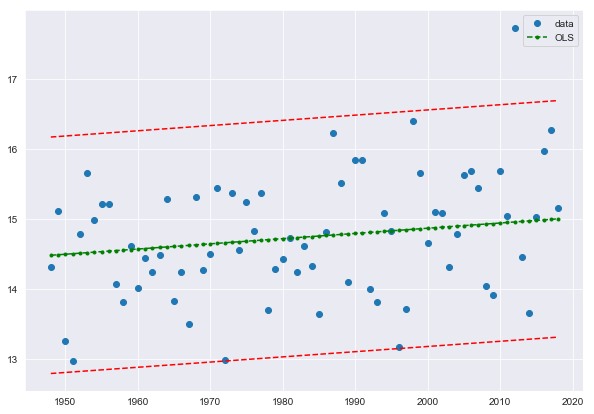

In [55]:
#https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
fig = plt.figure(figsize=(50,50))
# predictor variable (x) and dependent variable (y)
y = df_merged["max_temp_c_mean"]
x = df_merged["year"]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');


In [ ]:
df.to_csv('test.csv', sep=',')